SNR=10dB


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 1/1 [00:04<00:00,  4.22s/it]


SNR=11dB


100%|██████████| 1/1 [00:04<00:00,  4.22s/it]


SNR=12dB


100%|██████████| 1/1 [00:04<00:00,  4.33s/it]


SNR=13dB


100%|██████████| 1/1 [00:04<00:00,  4.20s/it]


SNR=14dB


100%|██████████| 1/1 [00:04<00:00,  4.20s/it]


SNR=10dB


100%|██████████| 1/1 [00:06<00:00,  6.66s/it]


SNR=11dB


100%|██████████| 1/1 [00:06<00:00,  6.53s/it]


SNR=12dB


100%|██████████| 1/1 [00:06<00:00,  6.71s/it]


SNR=13dB


100%|██████████| 1/1 [00:08<00:00,  8.10s/it]


SNR=14dB


100%|██████████| 1/1 [00:08<00:00,  8.22s/it]


SNR=0dB


100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


SNR=1dB


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


SNR=2dB


100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


SNR=3dB


100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


SNR=4dB


100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


SNR=6dB


100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


SNR=7dB


100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


SNR=0dB


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


SNR=1dB


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


SNR=2dB


100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


SNR=3dB


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


SNR=4dB


100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


SNR=6dB


100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


SNR=7dB


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


SNR=0dB


100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


SNR=1dB


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


SNR=2dB


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


SNR=3dB


100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


SNR=4dB


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


SNR=6dB


100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


SNR=7dB


100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


SNR=0dB


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


SNR=1dB


100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


SNR=2dB


100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


SNR=3dB


100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


SNR=4dB


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


SNR=6dB


100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


SNR=7dB


100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  2.35it/s]
c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

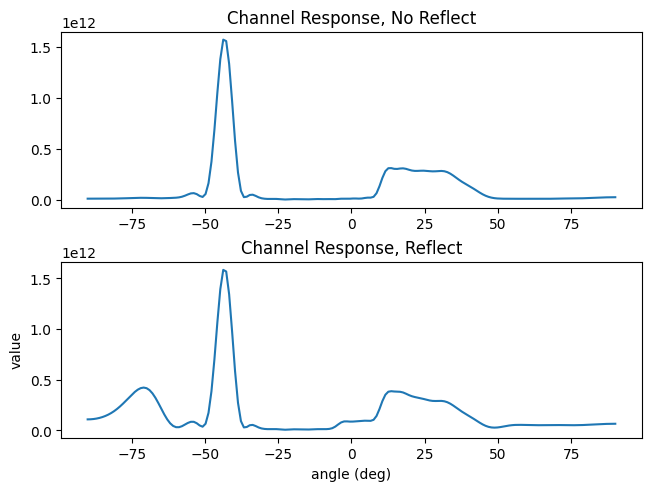

'\nplt.figure()\nplt.plot(My_ue_nobf.snr_list, mse_bf, \'x\')\nplt.axhline(y=0, color=\'r\', linestyle=\'-\')\n#plt.plot(My_ue.snr_list, mse_bf[:], \'x\')\nplt.legend ([\'MSE\']) #([\'MSE, No BF\', \'MSE, BF\'])\nplt.xlabel(\'SNR (dB)\')\nplt.ylabel(\'MSE (dB)\')\nplt.title(f\'fc={fc/1000:.1f}kHz\')\nplt.show()\n\n\nfig,ax = plt.subplots()\nax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c=\'r\', marker=\'x\')\nax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c=\'g\', marker=\'x\')\nax.scatter(np.real(true_sym), np.imag(true_sym), c=\'b\',marker=\'o\')\nax.legend([\'RX DL, no BF\', \'RX DL, BF\',\'16QAM Constellation Points\'])\nax.set_ylim(-4, 4)\nax.set_xlim(-4,4)\nax.set_title("Constellation Diagram for SNR=15dB")\nplt.show()\n'

<Figure size 640x480 with 0 Axes>

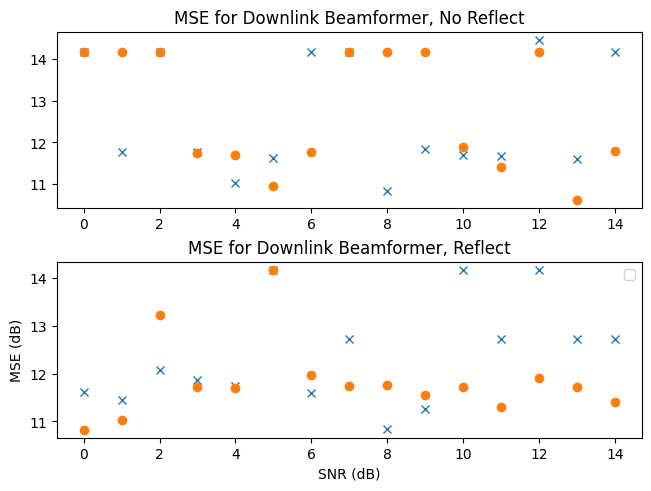

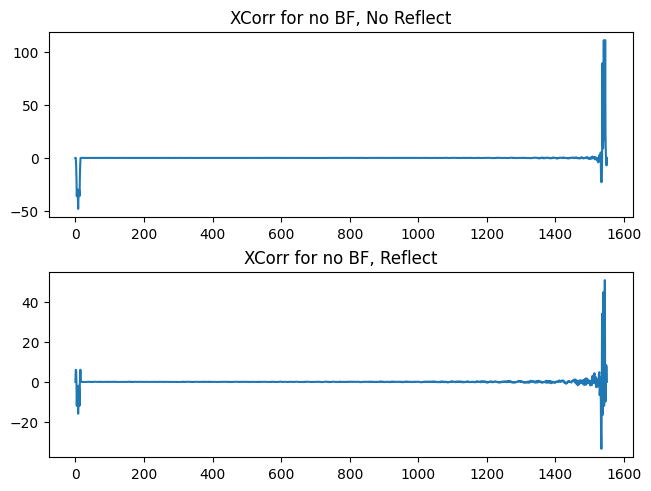

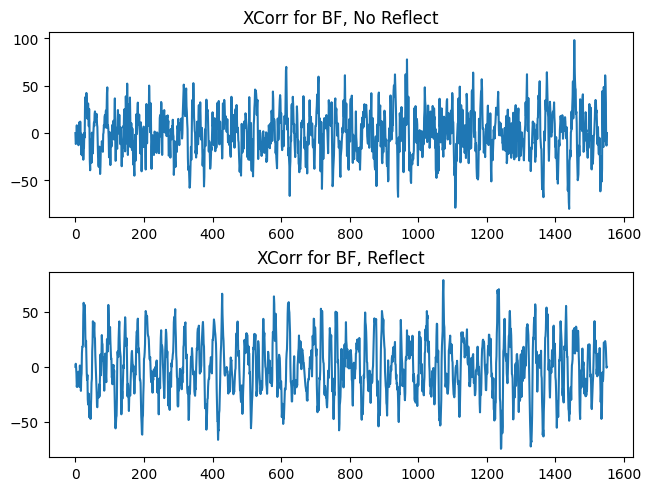

In [1]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt
from downlink import downlink

fc = 6.5e3
# Design with one tx (AWGN LOS), then with tx + reflect
My_bf_1 = bf_multichannel_const(6.5e3, 1, 1, 1)
My_bf_1.reflection_list = np.array([1])
My_bf_1.x_tx_list = np.array([5])
My_bf_1.y_tx_list = np.array([5])

My_bf_2 = bf_multichannel_const(6.5e3, 2, 1, 1) #still unclear on that second variable
My_bf_2.reflection_list = np.array([1,0.5])
My_bf_2.x_tx_list = np.array([5,15])
My_bf_2.y_tx_list = np.array([5,5])

theta_bf_1, wk_1, S_theta_1 = My_bf_1.simulation()
theta_bf_2, wk_2, S_theta_2 = My_bf_2.simulation() 

# run this 4 times -> no bf, no reflect; no bf, reflect; bf, no reflect; bf, reflect;
My_ue_nobf_1 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False)
My_ue_nobf_1.reflection_list = np.array([1])
My_ue_nobf_1.x_rx_list = np.array([5])
My_ue_nobf_1.y_rx_list = np.array([5])
My_ue_nobf_1.simulation()
mse_no_bf_1 = My_ue_nobf_1.mean_mse
symbolset_no_bf_1 = My_ue_nobf_1.mean_symbols[-1,:]

My_ue_nobf_2 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False) #should you change the 2nd variable?
My_ue_nobf_2.reflection_list = np.array([1,0.5])
My_ue_nobf_2.x_rx_list = np.array([5,15])
My_ue_nobf_2.y_rx_list = np.array([5,5])
My_ue_nobf_2.simulation()
mse_no_bf_2 = My_ue_nobf_2.mean_mse
symbolset_no_bf_2 = My_ue_nobf_2.mean_symbols[-1,:]

My_ue_bf_1 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=True)
My_ue_bf_1.reflection_list = np.array([1])
My_ue_bf_1.x_rx_list = np.array([5])
My_ue_bf_1.y_rx_list = np.array([5])
My_ue_bf_1.simulation()
mse_bf_1 = My_ue_bf_1.mean_mse
symbolset_bf_1 = My_ue_bf_1.mean_symbols[-1,:]

My_ue_bf_2 = downlink(6.5e3, 1, 1, theta=theta_bf_2, wk=wk_2, apply_bf=True)
My_ue_bf_2.reflection_list = np.array([1,0.5])
My_ue_bf_2.x_rx_list = np.array([5,15])
My_ue_bf_2.y_rx_list = np.array([5,5])
My_ue_bf_2.simulation()
mse_bf_2 = My_ue_bf_2.mean_mse
symbolset_bf_2 = My_ue_bf_2.mean_symbols[-1,:]


# equalizer taps
true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))

# S_theta Plots
plt.figure(1)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(np.linspace(-90,90,len(S_theta_1)), S_theta_1)
plt.xlabel('angle (deg)')
plt.ylabel('value')
ax1.set_title('Channel Response, No Reflect')
ax2.plot(np.linspace(-90,90,len(S_theta_2)), S_theta_2)
ax2.set_title('Channel Response, Reflect')
plt.show()

# D0 plots -> later

# SNR/MSE Plots
plt.figure(2)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(My_ue_nobf_1.snr_list, mse_no_bf_1, 'x')
ax1.plot(My_ue_bf_1.snr_list, mse_bf_1, 'o')
plt.legend (['No BF', 'BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
ax1.set_title('MSE for Downlink Beamformer, No Reflect')
ax2.plot(My_ue_nobf_2.snr_list, mse_no_bf_2, 'x')
ax2.plot(My_ue_bf_2.snr_list, mse_bf_2, 'o')
ax2.set_title('MSE for Downlink Beamformer, Reflect')
plt.show

# xcorr graphs
# symbolset_x_bf_x and true_sym

plt.figure(3)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(np.correlate(true_sym.flatten(),symbolset_no_bf_1.flatten(), 'full'))
ax2.plot(np.correlate(true_sym.flatten(),symbolset_no_bf_2.flatten(), 'full'))
ax1.set_title('XCorr for no BF, No Reflect')
ax2.set_title('XCorr for no BF, Reflect')

plt.figure(4)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(np.correlate(true_sym.flatten(),symbolset_bf_1.flatten(), 'full'))
ax2.plot(np.correlate(true_sym.flatten(),symbolset_bf_2.flatten(), 'full'))
ax1.set_title('XCorr for BF, No Reflect')
ax2.set_title('XCorr for BF, Reflect')

"""
plt.figure()
plt.plot(My_ue_nobf.snr_list, mse_bf, 'x')
plt.axhline(y=0, color='r', linestyle='-')
#plt.plot(My_ue.snr_list, mse_bf[:], 'x')
plt.legend (['MSE']) #(['MSE, No BF', 'MSE, BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
plt.title(f'fc={fc/1000:.1f}kHz')
plt.show()


fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c='r', marker='x')
ax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""